In [1]:
import time
from customized.main.DatasetManager import DatasetManager
from customized.main.Evaluator import Evaluator
from customized.main.models.ClusteredUserBasedCF import ClusteredUserBasedCF
from customized.main.models.ItemBasedCF import ItemBasedCF
from customized.main.models.UserBasedCF import UserBasedCF
from customized.main.utils.plot_generators import gen_grouped_histogram_bars, measure_time

In [2]:
dirname = '/home/damian/Pulpit/Warsztat/CoML/recomm_project/data/'
dm = DatasetManager()

In [3]:
ml100k_filename = dirname + 'ml-100k/ua.base'
ml100k_filename_test = dirname + 'ml-100k/ua.test'

train = dm.load_csv(ml100k_filename, realative=False)
test = dm.load_csv(ml100k_filename_test, realative=False)

user_item = DatasetManager.transform_to_user_item_mat(train, verbose=True)
user_item_test = DatasetManager.transform_to_user_item_mat(test, verbose=True)

User number: 943, item number: 1682
User number: 943, item number: 1664


In [4]:
models = [
    { 'model': UserBasedCF, 'name': 'UserBasedCF'},
    { 'model': ItemBasedCF, 'name': 'ItemBasedCF'},
    { 'model': ClusteredUserBasedCF, 'name': 'ClustUsrBasedCF'}
]

plots = [
    {'key': 'fit_time', 'name': 'Fitting time comparison', 'xlabel': 'models', 'ylabel': 't [s]'},
    {'key': 'pred_time', 'name': 'Prediction time comparison', 'xlabel': 'models', 'ylabel': 't [s]'},
    {'key': 'prec', 'name': 'Precision comparison', 'xlabel': 'models', 'ylabel': 'prec'},
    {'key': 'recall', 'name': 'Recall comparison', 'xlabel': 'models', 'ylabel': 'recall'},
    {'key': 'f1', 'name': 'F1 score comparison', 'xlabel': 'models', 'ylabel': 'f1'},
    {'key': 'rmse', 'name': 'RMSE comparison', 'xlabel': 'models', 'ylabel': 'rmse'},
    {'key': 'mae', 'name': 'MAE comparison', 'xlabel': 'models', 'ylabel': 'mae'}
]

def func(sink, model_desc, _):
    model_class = model_desc['model']
    model = model_class(verbose=True)
    
    # fit model 
    measure_time(lambda: model.fit(user_item), sink['fit_time'])
    
    # predict
    pred = measure_time(lambda: model.predict_all(), sink['pred_time'])
    
    # recommend
    recomm, _ = model._recommend_all(pred)
    recomm = model._transform_recomm(recomm)

    # eval
    eval = Evaluator(user_item_test).eval(recomm, pred)
    
    sink['prec'].append(eval['prec'])
    sink['recall'].append(eval['recall'])
    sink['f1'].append(eval['f1'])
    sink['rmse'].append(eval['rmse'])
    sink['mae'].append(eval['mae'])
    
repeat = 3

(0) started calculation for UserBasedCF case
[UserBasedCF.fit] total 5.38 seconds have spent

[UserBasedCF.predict_all] total 25.19 seconds have spent

[UserBasedCF.fit] total 5.37 seconds have spent

[UserBasedCF.predict_all] total 24.02 seconds have spent

[UserBasedCF.fit] total 5.20 seconds have spent

[UserBasedCF.predict_all] total 24.21 seconds have spent

>>> results for value : 
  >>> fit_time - y: 5.317907015482585
  >>> pred_time - y: 24.473367770512898
  >>> prec - y: 0.22311770943796394
  >>> recall - y: 0.22311770943796394
  >>> f1 - y: 0.22311770943796394
  >>> rmse - y: 2.7590386748049904
  >>> mae - y: 2.473235757817765
(1) started calculation for ItemBasedCF case
[ItemBasedCF.fit] total 23.37 seconds have spent

[ItemBasedCF.predict_all] total 7.09 seconds have spent

[ItemBasedCF.fit] total 23.12 seconds have spent

[ItemBasedCF.predict_all] total 6.94 seconds have spent

[ItemBasedCF.fit] total 23.09 seconds have spent

[ItemBasedCF.predict_all] total 7.00 seconds h

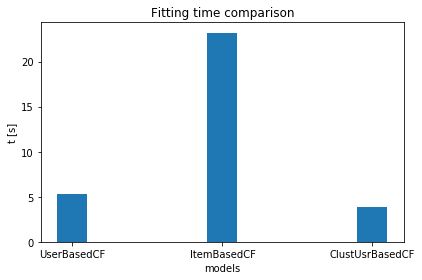

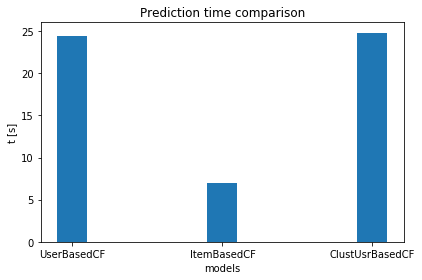

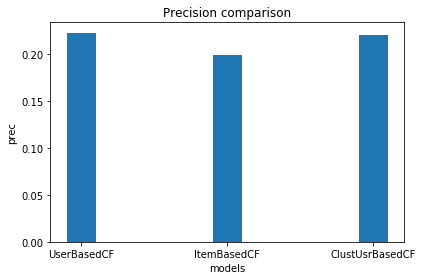

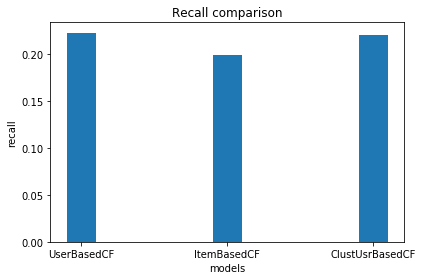

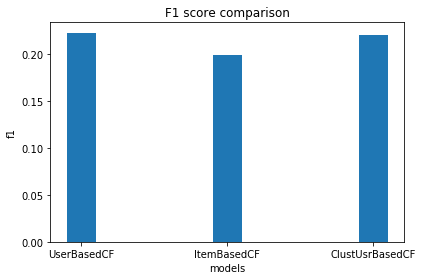

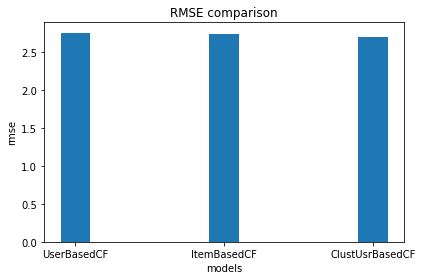

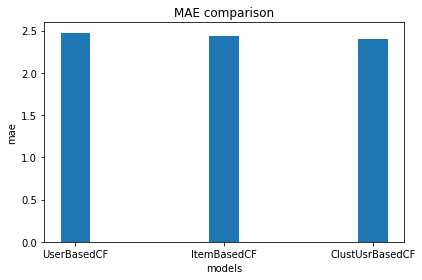

In [5]:
gen_grouped_histogram_bars(plots, models, [''], func, repeat, 
                           show_bar_values=False, verbose=True, show_legend=False)